In [1]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip -O /tmp/horse-or-human.zip

--2020-06-07 05:39:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   112MB/s    in 1.3s    

2020-06-07 05:39:31 (112 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
import os
import zipfile
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [3]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

print(len(train_horse_names), len(train_human_names))

500 527


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as image

nrows, ncols = 4,4
pic_index = 0

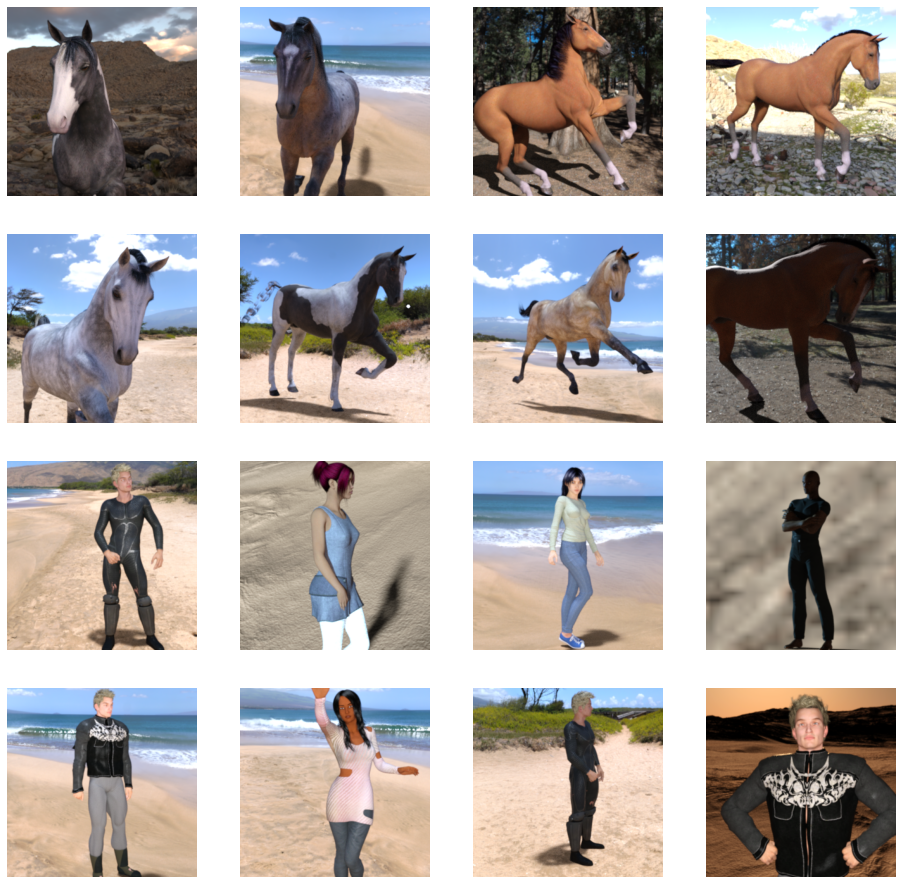

In [5]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index += 8

next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  img = image.imread(img_path)
  plt.imshow(img)

plt.show()

In [0]:
import tensorflow as tf

In [17]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 32)       

In [0]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human',
    target_size=(300,300),
    batch_size=64,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [20]:
history = model.fit(train_generator, epochs=15, verbose=1)

Epoch 1/15
17/17 [==============================] - 7s 386ms/step - loss: 0.8176 - accuracy: 0.6456
Epoch 2/15
17/17 [==============================] - 7s 413ms/step - loss: 0.2749 - accuracy: 0.8919
Epoch 3/15
17/17 [==============================] - 7s 390ms/step - loss: 0.1896 - accuracy: 0.9202
Epoch 4/15
17/17 [==============================] - 7s 397ms/step - loss: 0.3258 - accuracy: 0.9056
Epoch 5/15
17/17 [==============================] - 7s 390ms/step - loss: 0.1066 - accuracy: 0.9640
Epoch 6/15
17/17 [==============================] - 7s 385ms/step - loss: 0.1314 - accuracy: 0.9474
Epoch 7/15
17/17 [==============================] - 7s 419ms/step - loss: 0.1022 - accuracy: 0.9649
Epoch 8/15
17/17 [==============================] - 7s 392ms/step - loss: 0.0358 - accuracy: 0.9883
Epoch 9/15
17/17 [==============================] - 7s 388ms/step - loss: 0.5184 - accuracy: 0.9474
Epoch 10/15
17/17 [==============================] - 7s 389ms/step - loss: 0.0191 - accuracy: 0.9981

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


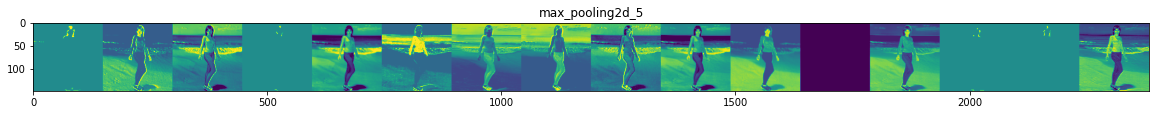

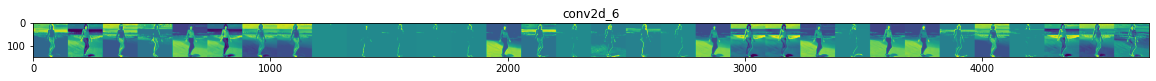

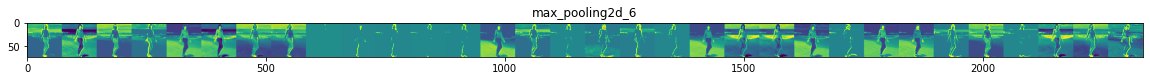

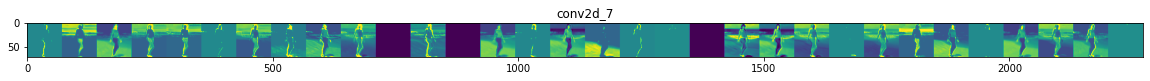

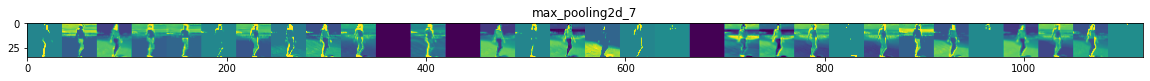

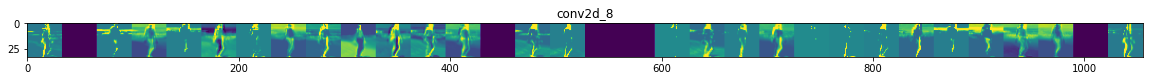

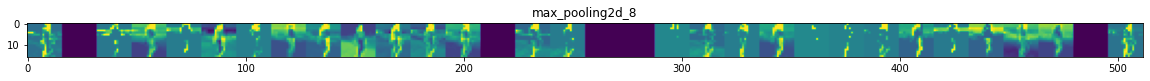

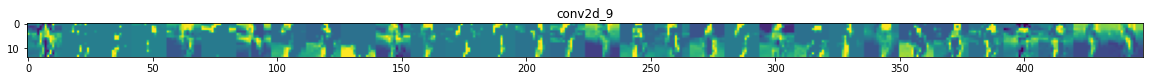

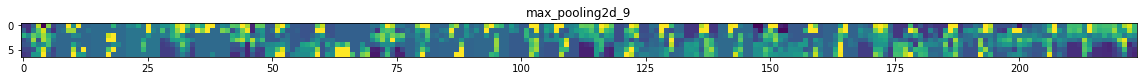

In [22]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, fname) for fname in train_horse_names]
human_img_files = [os.path.join(train_human_dir, fname) for fname in train_human_names]

img_path = random.choice(horse_img_files + human_img_files)
img = load_img(img_path, target_size=(300,300))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

x /= 255
successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))

    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i+1) * size] = x
    scale = 20./n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
